In [ ]:
# @title Importando bibliotecas

# Imports do sistema
import warnings

# Imports de terceiros
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import (
    AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    HistGradientBoostingClassifier, RandomForestClassifier
    )
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
    )
from sklearn.model_selection import (
    GridSearchCV, KFold, cross_val_score,
    train_test_split
    )
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [ ]:
# @title Importando o dataset

# Definição do caminho
PATH = '/content/drive/MyDrive/Materiais do TCC/Teste YOLO/Projeto Canoas/TCC2'

# Carrega o DataFrame a partir do arquivo CSV
df = pd.read_csv(PATH + '/keypoints_pose_v1.csv')

# Obtém o conjunto de dados de keypoints
df = df.iloc[:, 1:]

# Exibe as 5 primeiras linhas do DataFrame
df.head()


,label,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,Caido,0.792430,0.613291,0.799647,0.631989,0.800377,0.603245,0.778640,0.693841,0.787107,...,0.589738,0.646124,0.543216,0.447671,0.559041,0.439603,0.512550,0.241521,0.528212,0.228444
1,Caido,0.625301,0.288902,0.662422,0.235695,0.596074,0.234829,0.706336,0.238714,0.555535,...,0.771434,0.262907,0.950526,0.257640,0.871672,0.195308,0.967513,0.120665,0.907647,0.081932
2,Caido,0.372103,0.386051,0.373427,0.341881,0.348586,0.367384,0.378351,0.311462,0.305991,...,0.452212,0.698635,0.715847,0.632951,0.511068,0.862256,0.892082,0.604929,0.735559,0.828270
3,Caido,0.156863,0.411583,0.154728,0.384514,0.141616,0.407594,0.160759,0.347576,0.126216,...,0.253522,0.449974,0.360880,0.496519,0.314429,0.535502,0.448568,0.583480,0.391605,0.595416
4,Caido,0.669781,0.656873,0.677087,0.678207,0.685352,0.637484,0.000000,0.000000,0.688933,...,0.466173,0.459130,0.506871,0.766583,0.385452,0.668150,0.309221,0.786041,0.200879,0.686373


In [ ]:
# @title Declarar vetor de recursos e variável de destino

# Codifica os rótulos das classes
encoder = LabelEncoder()
X = df.drop(['label'], axis=1)
y = encoder.fit_transform(df['label'])


In [ ]:
# @title Dividir os dados em conjuntos de treino e teste

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
    )

# Exibindo as formas dos conjuntos de dados resultantes
X_train.shape, X_test.shape


((3519, 34), (880, 34))

In [ ]:
# @title Dimensionamento de recursos

# Obtém os nomes das colunas do conjunto de treinamento
cols = X_train.columns

# Inicializa o escalador
scaler = StandardScaler()

# Ajusta e transforma os dados de treinamento
X_train = scaler.fit_transform(X_train)

# Apenas transforma os dados de teste
X_test = scaler.transform(X_test)

# Converte as matrizes transformadas de volta para DataFrames
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# Exibe a descrição do conjunto de treinamento
X_train.describe()


,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
count,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,...,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03,3.519000e+03
mean,7.773770e-17,-1.463892e-16,4.543112e-17,-1.105491e-16,1.292263e-16,1.019676e-16,-1.110539e-17,1.509323e-16,3.331616e-17,-1.352838e-16,...,-1.877820e-16,-3.230658e-17,-3.634490e-17,1.822293e-16,-9.086224e-17,5.300297e-17,3.432574e-17,-1.630472e-16,1.837436e-16,-6.764189e-17
std,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,...,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00
min,-2.189033e+00,-1.760384e+00,-1.826137e+00,-1.450002e+00,-1.798481e+00,-1.443822e+00,-1.437160e+00,-1.205200e+00,-1.369248e+00,-1.189503e+00,...,-1.720134e+00,-1.685485e+00,-1.263032e+00,-1.291526e+00,-1.224944e+00,-1.287492e+00,-9.868825e-01,-1.035694e+00,-9.652513e-01,-1.034346e+00
25%,-3.746312e-01,-4.854333e-01,-4.713946e-01,-5.268926e-01,-4.646861e-01,-5.366647e-01,-1.437160e+00,-1.205200e+00,-1.369248e+00,-1.189503e+00,...,-4.988759e-01,-3.749899e-01,-1.263032e+00,-1.291526e+00,-1.224944e+00,-1.287492e+00,-9.868825e-01,-1.035694e+00,-9.652513e-01,-1.034346e+00
50%,2.350892e-01,-2.449408e-02,3.275147e-01,-1.553744e-02,2.893551e-01,-8.003666e-03,4.094244e-01,7.165143e-02,3.537371e-01,9.706374e-02,...,2.610154e-01,1.050691e-01,2.822419e-01,3.847703e-01,2.137727e-01,3.801177e-01,-4.072963e-02,1.241175e-01,-1.312352e-01,1.074009e-01
75%,5.892756e-01,4.535499e-01,6.412341e-01,4.549366e-01,6.138073e-01,4.445039e-01,7.484207e-01,5.186524e-01,7.089938e-01,5.574892e-01,...,6.528369e-01,6.653644e-01,7.976319e-01,8.017946e-01,8.221094e-01,7.974484e-01,8.384733e-01,1.018667e+00,8.557725e-01,1.023329e+00
max,2.378992e+00,3.280116e+00,2.213212e+00,3.345447e+00,2.462568e+00,3.263857e+00,2.041416e+00,3.469585e+00,2.517509e+00,3.388116e+00,...,2.618682e+00,1.691074e+00,2.146218e+00,1.679118e+00,2.560717e+00,1.652077e+00,2.293914e+00,1.566192e+00,2.549634e+00,1.561527e+00


In [ ]:
# @title Executar SVM com hiperparâmetros padrão

# Instanciar classificador com hiperparâmetros padrão
svc_padrao = SVC()

# Ajustar o classificador ao conjunto de treino
svc_padrao.fit(X_train, y_train)

# Fazer previsões no conjunto de testes
y_pred = svc_padrao.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.9125


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.88      0.92       176
           1       0.80      0.95      0.87       176
           2       0.95      0.97      0.96       176
           3       0.92      0.94      0.93       176
           4       0.97      0.82      0.89       176

    accuracy                           0.91       880
   macro avg       0.92      0.91      0.91       880
weighted avg       0.92      0.91      0.91       880



In [ ]:
# @title Executar o SVM com o kernel rbf e C=100.0

# Instanciar classificador com kernel rbf e C=100
svc100 = SVC(C=100.0)

svc100.fit(X_train, y_train)

y_pred = svc100.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.9489


<Axes: >

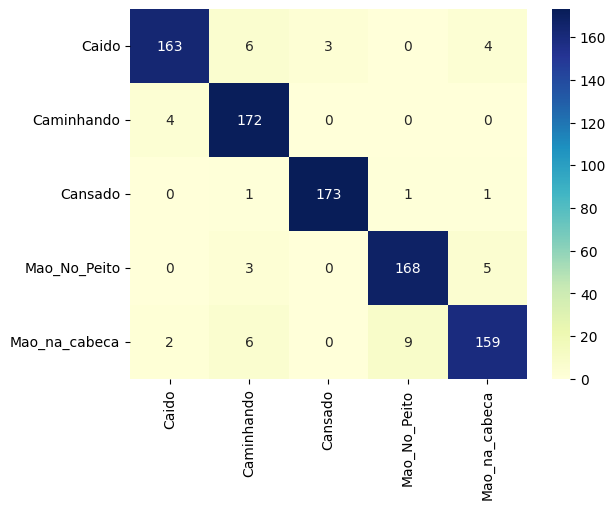

In [ ]:
# @title Matriz de confusão

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criar um DataFrame a partir da matriz de confusão
cm_matrix = pd.DataFrame(data=cm, columns=df['label'].unique(), index=df['label'].unique())

# Plotar a matriz de confusão
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       176
           1       0.91      0.98      0.95       176
           2       0.98      0.98      0.98       176
           3       0.94      0.95      0.95       176
           4       0.94      0.90      0.92       176

    accuracy                           0.95       880
   macro avg       0.95      0.95      0.95       880
weighted avg       0.95      0.95      0.95       880



In [ ]:
# @title Executar o SVM com o kernel rbf e C=1000.0

# Instanciar classificador com kernel rbf e C=1000
svc1000 = SVC(C=1000.0)

svc1000.fit(X_train, y_train)

y_pred = svc1000.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.9432


<Axes: >

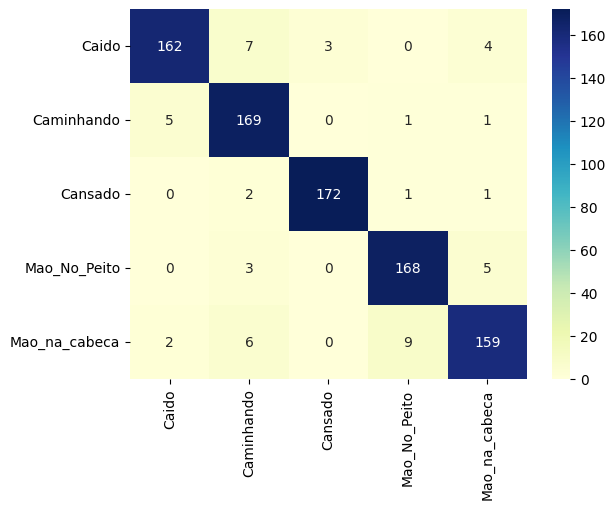

In [ ]:
# @title Matriz de confusão

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=df['label'].unique(), index=df['label'].unique())

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       176
           1       0.90      0.96      0.93       176
           2       0.98      0.98      0.98       176
           3       0.94      0.95      0.95       176
           4       0.94      0.90      0.92       176

    accuracy                           0.94       880
   macro avg       0.94      0.94      0.94       880
weighted avg       0.94      0.94      0.94       880



In [ ]:
# @title Executar SVM com kernel linear e C=1.0

# Instanciar classificador com kernel linear e C=1.0
linear_svc = SVC(kernel='linear', C=1.0)

linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.8818


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       176
           1       0.86      0.89      0.88       176
           2       0.94      0.94      0.94       176
           3       0.87      0.92      0.90       176
           4       0.92      0.78      0.85       176

    accuracy                           0.88       880
   macro avg       0.88      0.88      0.88       880
weighted avg       0.88      0.88      0.88       880



In [ ]:
# @title Executar SVM com kernel linear e C=100.0

# Instanciar classificador com kernel linear e C=100.0
linear_svc100 = SVC(kernel='linear', C=100.0)

linear_svc100.fit(X_train, y_train)

y_pred = linear_svc100.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.8841


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       176
           1       0.89      0.89      0.89       176
           2       0.96      0.94      0.95       176
           3       0.88      0.93      0.90       176
           4       0.90      0.77      0.83       176

    accuracy                           0.88       880
   macro avg       0.89      0.88      0.88       880
weighted avg       0.89      0.88      0.88       880



In [ ]:
# @title Executar SVM com kernel linear e C=1000.0

# Instanciar classificador com kernel linear e C=1000.0
linear_svc1000 = SVC(kernel='linear', C=1000.0)

linear_svc1000.fit(X_train, y_train)

y_pred = linear_svc1000.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.8841


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       176
           1       0.89      0.89      0.89       176
           2       0.96      0.94      0.95       176
           3       0.88      0.93      0.90       176
           4       0.91      0.77      0.83       176

    accuracy                           0.88       880
   macro avg       0.89      0.88      0.88       880
weighted avg       0.89      0.88      0.88       880



In [ ]:
# @title Comparar a precisão do conjunto de treino e teste

y_pred_train = linear_svc.predict(X_train)

print('Acurácia do conjunto de treino: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Acurácia do conjunto de treino: 0.8949


In [ ]:
# @title Verificar se existe overfitting e underfitting

print('Acurácia do conjunto de treino: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Acurácia do conjunto de teste: {:.4f}'.format(linear_svc.score(X_test, y_test)))


Acurácia do conjunto de treino: 0.8949
Acurácia do conjunto de teste: 0.8818


In [ ]:
# @title Executar SVM com kernel polinomial e C=1.0

# Instanciar classificador com kernel polinomial e C=1.0
poly_svc = SVC(kernel='poly', C=1.0)

poly_svc.fit(X_train, y_train)

y_pred = poly_svc.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.8864


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.82      0.89       176
           1       0.79      0.91      0.85       176
           2       0.84      0.97      0.90       176
           3       0.92      0.91      0.91       176
           4       0.97      0.82      0.89       176

    accuracy                           0.89       880
   macro avg       0.90      0.89      0.89       880
weighted avg       0.90      0.89      0.89       880



In [ ]:
# @title Executar SVM com kernel polinomial e C=100.0

# Instanciar classificador com kernel polinomial e C=100.0
poly_svc100 = SVC(kernel='poly', C=100.0)

poly_svc100.fit(X_train, y_train)

y_pred = poly_svc100.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.9250


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.87      0.91       176
           1       0.87      0.96      0.91       176
           2       0.94      0.98      0.96       176
           3       0.96      0.94      0.95       176
           4       0.92      0.88      0.90       176

    accuracy                           0.93       880
   macro avg       0.93      0.93      0.92       880
weighted avg       0.93      0.93      0.92       880



In [ ]:
# @title Executar SVM com kernel sigmóide e C=1.0

# Instanciar classificador com kernel sigmóide e C=1.0
sigmoid_svc = SVC(kernel='sigmoid', C=1.0)

sigmoid_svc.fit(X_train,y_train)

y_pred = sigmoid_svc.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.7000


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.69      0.59       176
           1       0.66      0.62      0.64       176
           2       0.73      0.68      0.70       176
           3       0.83      0.82      0.83       176
           4       0.86      0.69      0.76       176

    accuracy                           0.70       880
   macro avg       0.72      0.70      0.70       880
weighted avg       0.72      0.70      0.70       880



In [ ]:
# @title Executar SVM com kernel sigmóide e C=100.0

# Instanciar classificador com kernel sigmóide e C=100.0
sigmoid_svc100 = SVC(kernel='sigmoid', C=100.0)

sigmoid_svc100.fit(X_train,y_train)

y_pred = sigmoid_svc100.predict(X_test)

print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Acurácia: 0.6773


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.65      0.57       176
           1       0.65      0.62      0.63       176
           2       0.75      0.67      0.71       176
           3       0.78      0.77      0.77       176
           4       0.75      0.68      0.72       176

    accuracy                           0.68       880
   macro avg       0.69      0.68      0.68       880
weighted avg       0.69      0.68      0.68       880



<Axes: >

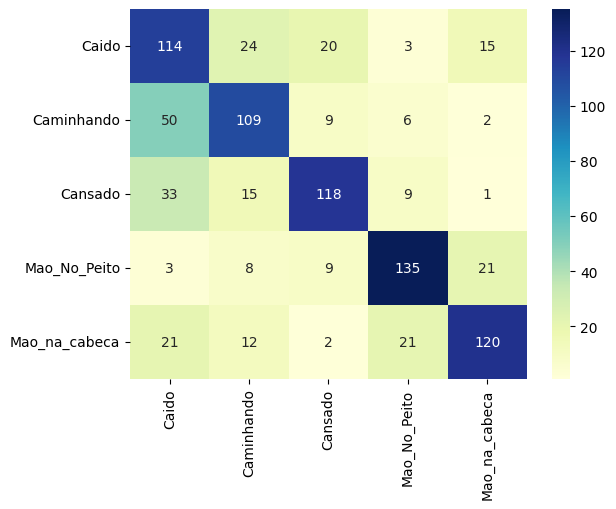

In [ ]:
# @title Matriz de confusão

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=df['label'].unique(), index=df['label'].unique())

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.65      0.57       176
           1       0.65      0.62      0.63       176
           2       0.75      0.67      0.71       176
           3       0.78      0.77      0.77       176
           4       0.75      0.68      0.72       176

    accuracy                           0.68       880
   macro avg       0.69      0.68      0.68       880
weighted avg       0.69      0.68      0.68       880



In [ ]:
# @title Acurácia de classificação

TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Acurácia: {0:0.4f}'.format(classification_accuracy))


Acurácia: 0.7508


In [ ]:
# @title Erro de classificação

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Erro: {0:0.4f}'.format(classification_error))


Erro: 0.2492


In [ ]:
# @title Precisão

precision = TP / float(TP + FP)

print('Precisão: {0:0.4f}'.format(precision))


Precisão: 0.8261


In [ ]:
# @title Cobertura

recall = TP / float(TP + FN)

print('Cobertura: {0:0.4f}'.format(recall))


Cobertura: 0.6951


In [ ]:
# @title Verdadeiro Positivo

true_positive_rate = TP / float(TP + FN)

print('TP: {0:0.4f}'.format(true_positive_rate))


TP: 0.6951


In [ ]:
# @title Falso Positivo

false_positive_rate = FP / float(FP + TN)

print('FP: {0:0.4f}'.format(false_positive_rate))


FP: 0.1805


In [ ]:
# @title Especificidade

specificity = TN / (TN + FP)

print('Especificidade: {0:0.4f}'.format(specificity))


Especificidade: 0.8195


In [ ]:
# @title Validação cruzada estratificada k-Fold com divisão aleatória com kernel linear

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc = SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=k_fold)

print('Pontuações médias estratificadas de validação cruzada com kernel linear:\n\n{}'.format(linear_scores.mean()))


Pontuações médias estratificadas de validação cruzada com kernel linear:

0.8690629847967731


In [ ]:
# @title Validação cruzada k-Fold estratificada com divisão aleatória com kernel rbf

rbf_svc = SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=k_fold)

print('Pontuações médias estratificadas de validação cruzada com o kernel rbf:\n\n{}'.format(rbf_scores.mean()))


Pontuações médias estratificadas de validação cruzada com o kernel rbf:

0.9181647533354018


In [ ]:
# @title Otimização de hiperparâmetros usando o GridSearchCV

svc = SVC()

# Declarar parâmetros para o ajuste de hiperparâmetros
# parameters = [
#     # {
#     #     # 'C': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100],
#     #     'C': [1e-3, 1e-2, 0.1, 1, 10, 100],
#     #     'kernel': ['linear']
#     # },
#     # {
#     #     'C': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100],
#     #     'kernel':['rbf'],
#     #     'gamma': [(valor / 10) for valor in range(20)]
#     # },
#     {
#         'C': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100],
#         'kernel': ['poly'],
#         'degree': [valor for valor in range(16)],
#         'gamma': [valor / 10000 for valor in range(0, 201, 10)] + [valor / 10 for valor in range(20)],
#         # 'coef0': [-2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0, 3.0]
#     }
# ]


parameters = [
    # {
    #     # 'C': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100],
    #     'C': [1e-3, 1e-2, 0.1, 1, 10, 100],
    #     'kernel': ['linear']
    # },
    # {
    #     'C': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100],
    #     'kernel':['rbf'],
    #     'gamma': [(valor / 10) for valor in range(20)]
    # },
    {
        'C': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100],
        'gamma': list(set([valor / 10000 for valor in range(0, 201)] + [valor / 10 for valor in range(20)])),
        'coef0': [-1.0, 0.0, 1.0]
    }
]

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=parameters,
    refit=True,
    scoring='accuracy',
    cv=5,
    verbose=0
    )

# Ajustar o GridSearchCV ao conjunto de treinamento
grid_search.fit(X_train, y_train)

# Exibir resultados da pesquisa
print('Melhor pontuação do GridSearchCV: {:.4f}\n\n'.format(grid_search.best_score_))
print('Parâmetros que dão os melhores resultados:','\n\n', (grid_search.best_params_))
print('\n\nEstimador que foi escolhido pela pesquisa:','\n\n', (grid_search.best_estimator_))
print('Pontuação GridSearchCV no conjunto de teste: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

# Fazer previsões com o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

# Exibir a acurácia das previsões
print('Acurácia: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Melhor pontuação do GridSearchCV: 0.9440


Parâmetros que dão os melhores resultados: 

 {'C': 100, 'coef0': -1.0, 'gamma': 0.0127}


Estimador que foi escolhido pela pesquisa: 

 SVC(C=100, coef0=-1.0, gamma=0.0127)
Pontuação GridSearchCV no conjunto de teste: 0.9511
Acurácia: 0.9511


<Axes: >

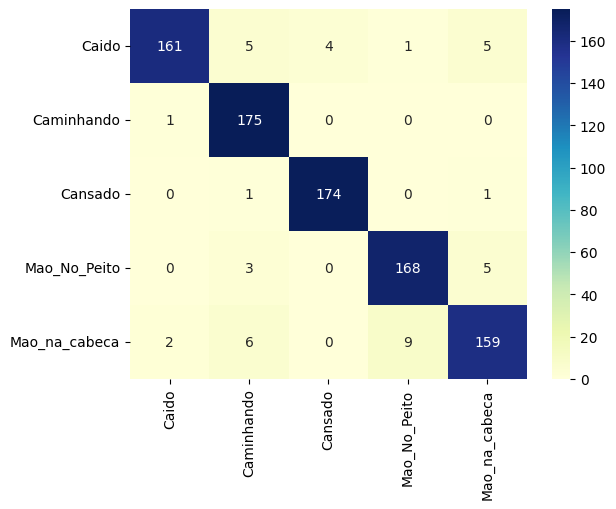

In [ ]:
# @title Matriz de confusão

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=df['label'].unique(), index=df['label'].unique())

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
# @title Métricas de classificação

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.91      0.95       176
           1       0.92      0.99      0.96       176
           2       0.98      0.99      0.98       176
           3       0.94      0.95      0.95       176
           4       0.94      0.90      0.92       176

    accuracy                           0.95       880
   macro avg       0.95      0.95      0.95       880
weighted avg       0.95      0.95      0.95       880



In [ ]:
from joblib import dump

# Salvar o modelo treinado como um arquivo joblib
dump(grid_search, f'{PATH}/pesos_pose_classification_v1_svc.joblib')


['/content/drive/MyDrive/Materiais do TCC/Teste YOLO/Projeto Canoas/TCC2/pesos_pose_classification_v1_svc.joblib']